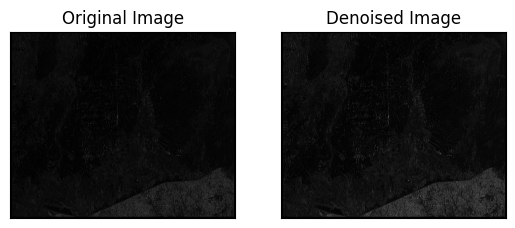

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread('C:\\Users\\Qandeel\\Downloads\\HH-ALPSRP247640560-H2.2_UA.tif', 0)  # Load the TIFF image in grayscale
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)  # Adjust the kernel size as needed
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(blurred_image, cmap='gray')
plt.title('Denoised Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [2]:
cv2.imwrite('denoised_image.tif', blurred_image)

True

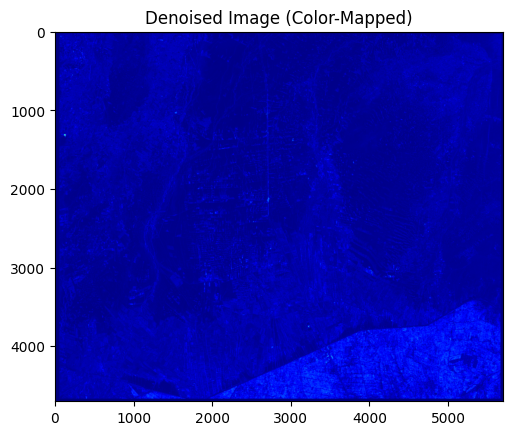

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image = cv2.imread('C:\\Users\\Qandeel\\Downloads\\HH-ALPSRP247640560-H2.2_UA.tif', 0)

# Apply noise reduction
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Apply a colormap for visualization
colormap_image = cv2.applyColorMap(blurred_image, cv2.COLORMAP_JET)

# Display the color-mapped image
plt.imshow(cv2.cvtColor(colormap_image, cv2.COLOR_BGR2RGB))
plt.title('Denoised Image (Color-Mapped)')
plt.show()


In [10]:
import numpy as np

def mse(image1, image2):
    return np.mean((image1 - image2) ** 2)

original_image = cv2.imread('C:\\Users\\Qandeel\\Downloads\\HH-ALPSRP247640560-H2.2_UA.tif', 0)
denoised_image = cv2.GaussianBlur(original_image, (5, 5), 0)

mse_value = mse(original_image, denoised_image)
print(f"Mean Squared Error: {mse_value}")

Mean Squared Error: 4.359914632325495


Structural Similarity Index (SSIM)

In [11]:
from skimage.metrics import structural_similarity as ssim

original_image = cv2.imread('C:\\Users\\Qandeel\\Downloads\\HH-ALPSRP247640560-H2.2_UA.tif', 0)
denoised_image = cv2.GaussianBlur(original_image, (5, 5), 0)

ssim_value = ssim(original_image, denoised_image)
print(f"Structural Similarity Index (SSIM): {ssim_value}")

Structural Similarity Index (SSIM): 0.9556807880157618


Reading Specific Pixel Value

In [12]:
import cv2
import numpy as np

# # Load the original image
original_image = cv2.imread(r'C:\\Users\\Qandeel\\Downloads\\HH-ALPSRP247640560-H2.2_UA.tif', 0)  # Load in grayscale

# # Load the denoised image
denoised_image = cv2.GaussianBlur(original_image, (7, 7), 3)

# Convert the images to NumPy arrays
original_pixels = np.array(original_image)
denoised_pixels = np.array(denoised_image)

# Now you can access the pixel values as NumPy arrays
# For example, to access the pixel value at row 1, column 1:
row, col = 150, 150
original_pixel_value = original_pixels[row, col]
denoised_pixel_value = denoised_pixels[row, col]

print(f'Original pixel value at ({row}, {col}): {original_pixel_value}')
print(f'Denoised pixel value at ({row}, {col}): {denoised_pixel_value}')

Original pixel value at (150, 150): 10
Denoised pixel value at (150, 150): 12


**Fourier Transform**

Original Image Amplitude (Magnitude):
[[4438.         3435.22300605 1623.40207572 ... 4305.55668479
  1623.40207572 3435.22300605]
 [2593.7415411  2230.12005108 2625.91318263 ... 2784.09629669
  3062.34741198 3059.09103367]
 [1598.58885614 2839.73323185  657.33952464 ... 4663.31231476
  6436.6840972   850.52750701]
 ...
 [1517.47963677 1361.64452098 2457.68225351 ... 1369.93394488
  3355.55945356 2807.00101205]
 [1598.58885614  850.52750701 6436.6840972  ... 1022.86670119
   657.33952464 2839.73323185]
 [2593.7415411  3059.09103367 3062.34741198 ... 2839.02752348
  2625.91318263 2230.12005108]]
Denoised Image Amplitude (Magnitude):
[[ 493.         1024.85382648 2124.98358831 ... 3299.51425853
  2124.98358831 1024.85382648]
 [1552.73780605 2121.82372488  674.23882206 ...  297.43116989
  2388.43104617 1794.29332765]
 [ 558.15574033 2227.92295122 1201.74711129 ...  610.62462608
  1425.16722242 1165.59709174]
 ...
 [2366.34089445  984.84318526  350.36870626 ...  703.39574228
   363.6212753

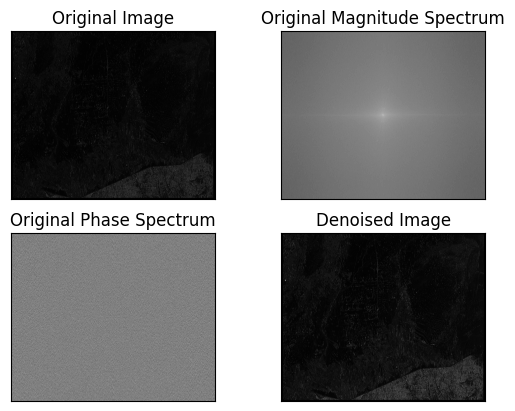

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original grayscale image
original_image = cv2.imread(r'C:\\Users\\Qandeel\\Downloads\\HH-ALPSRP247640560-H2.2_UA.tif', 0)

# Load the denoised image
denoised_image = cv2.imread('denoised_image.tif', 0)

# Ensure the images are not None
if original_image is not None and denoised_image is not None:
    # Compute the Fourier transform of the original image
    original_transform = np.fft.fft2(original_image)
    original_transform = np.fft.fftshift(original_transform)
    original_magnitude = np.abs(original_transform)
    original_phase = np.angle(original_transform)

    # Compute the Fourier transform of the denoised image
    denoised_transform = np.fft.fft2(denoised_image)
    denoised_transform = np.fft.fftshift(denoised_transform)
    denoised_magnitude = np.abs(denoised_transform)
    denoised_phase = np.angle(denoised_transform)
    
     # Print amplitude (magnitude) values for both images
    print("Original Image Amplitude (Magnitude):")
    print(original_magnitude)

    print("Denoised Image Amplitude (Magnitude):")
    print(denoised_magnitude)

    # Print phase values for both images
    print("Original Image Phase:")
    print(original_phase)

    print("Denoised Image Phase:")
    print(denoised_phase)

    # Display the original image and its Fourier transform
    plt.subplot(221), plt.imshow(original_image, cmap='gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])

    plt.subplot(222), plt.imshow(np.log(original_magnitude), cmap='gray')
    plt.title('Original Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

    plt.subplot(223), plt.imshow(original_phase, cmap='gray')
    plt.title('Original Phase Spectrum'), plt.xticks([]), plt.yticks([])
     # Display the denoised image and its Fourier transform
    plt.subplot(224), plt.imshow(denoised_image, cmap='gray')
    plt.title('Denoised Image'), plt.xticks([]), plt.yticks([])

    plt.show()

else:
    print("Error: Unable to load image(s). Please check the file paths.")